In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

In [17]:


csv_file_path = '/content/drive/MyDrive/USA/accident-datasets/US_Accidents_March23.csv'

# Count the total number of rows in your dataset
total_rows = sum(1 for line in open(csv_file_path))

# Define the fraction of the dataset you want to keep (e.g., 50%)
fraction_to_keep = 0.2

# Calculate the number of rows to skip
rows_to_skip = np.random.choice(range(1, total_rows), int(total_rows * (1 - fraction_to_keep)), replace=False)

# Read the CSV file while skipping the selected rows
df = pd.read_csv(csv_file_path, skiprows=rows_to_skip)


In [18]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-17,Source2,2,2016-02-08 08:53:17,2016-02-08 09:23:17,39.748329,-84.224007,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-19,Source2,2,2016-02-08 09:25:17,2016-02-08 09:55:17,39.740669,-84.184135,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-21,Source2,2,2016-02-08 10:11:15,2016-02-08 10:41:15,40.052509,-82.882332,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-24,Source2,3,2016-02-08 12:00:00,2016-02-08 12:45:00,40.023487,-82.994888,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545673,A-7777740,Source1,2,2019-08-23 15:19:26,2019-08-23 15:48:29,33.802780,-118.120810,33.802880,-118.131200,0.597,...,False,False,False,False,False,False,Day,Day,Day,Day
1545674,A-7777742,Source1,2,2019-08-23 15:33:46,2019-08-23 16:03:05,32.773510,-117.161180,32.768950,-117.162100,0.320,...,False,False,False,False,False,False,Day,Day,Day,Day
1545675,A-7777743,Source1,2,2019-08-23 16:28:17,2019-08-23 16:57:04,34.323752,-118.500833,34.340840,-118.521130,1.654,...,False,False,False,False,False,False,Day,Day,Day,Day
1545676,A-7777751,Source1,2,2019-08-23 16:43:59,2019-08-23 17:13:32,34.120911,-117.833454,34.120911,-117.833454,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545678 entries, 0 to 1545677
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1545678 non-null  object 
 1   Source                 1545678 non-null  object 
 2   Severity               1545678 non-null  int64  
 3   Start_Time             1545678 non-null  object 
 4   End_Time               1545678 non-null  object 
 5   Start_Lat              1545678 non-null  float64
 6   Start_Lng              1545678 non-null  float64
 7   End_Lat                864562 non-null   float64
 8   End_Lng                864562 non-null   float64
 9   Distance(mi)           1545678 non-null  float64
 10  Description            1545678 non-null  object 
 11  Street                 1543552 non-null  object 
 12  City                   1545624 non-null  object 
 13  County                 1545678 non-null  object 
 14  State             

In [20]:
df.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.545678e+06,1.545678e+06,1.545678e+06,864562.000000,864562.000000,1.545678e+06,1.513062e+06,1.144889e+06,1.510989e+06,1.517641e+06,1.510346e+06,1.431372e+06,1.104013e+06
mean,2.212766e+00,3.619742e+01,-9.471708e+01,36.256469,-95.742491,5.585801e-01,6.166019e+01,5.824299e+01,6.484794e+01,2.953980e+01,9.088793e+00,7.682723e+00,8.447482e-03
std,4.878911e-01,5.073866e+00,1.738849e+01,5.272025,18.107400,1.748056e+00,1.901874e+01,2.240690e+01,2.280651e+01,1.005185e+00,2.686404e+00,5.452353e+00,1.106606e-01
min,1.000000e+00,2.455480e+01,-1.244974e+02,24.570290,-124.497419,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339362e+01,-1.172230e+02,33.461609,-117.760000,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.581881e+01,-8.780133e+01,36.172055,-88.038648,2.900000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008099e+01,-8.035830e+01,40.174851,-80.249898,4.620000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900076e+01,-6.760686e+01,49.002025,-67.626576,2.272100e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,2.397000e+01


In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [22]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  0.440658
End_Lng                  0.440658
Precipitation(in)        0.285742
Wind_Chill(F)            0.259297
Wind_Speed(mph)          0.073952
Visibility(mi)           0.022859
Wind_Direction           0.022606
Humidity(%)              0.022443
Weather_Condition        0.022379
Temperature(F)           0.021101
Pressure(in)             0.018139
Weather_Timestamp        0.015471
Nautical_Twilight        0.003006
Civil_Twilight           0.003006
Sunrise_Sunset           0.003006
Astronomical_Twilight    0.003006
Airport_Code             0.002939
Street                   0.001375
Timezone                 0.000994
Zipcode                  0.000234
City                     0.000035
Traffic_Signal           0.000000
Roundabout               0.000000
Station                  0.000000
Stop                     0.000000
Traffic_Calming          0.000000
Country                  0.000000
Turning_Loop             0.000000
No_Exit                  0.000000
End_Time      

In [23]:
type(missing_percentages)


pandas.core.series.Series

<Axes: >

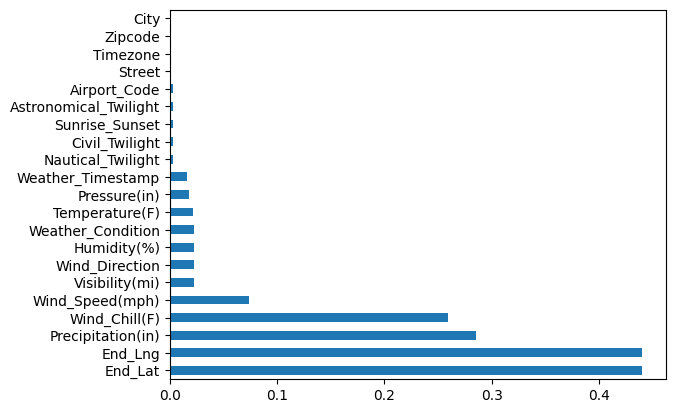

In [24]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Exploratory Analysis and Visualization
Columns we'll analyze:

City
Start Time
Start Lat, Start Lng
Temperature
Weather Condition

In [25]:
df.columns


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [26]:
df.City


0              Dayton
1              Dayton
2              Dayton
3            Columbus
4            Columbus
              ...    
1545673    Long Beach
1545674     San Diego
1545675        Sylmar
1545676      Glendora
1545677       Ventura
Name: City, Length: 1545678, dtype: object

In [27]:
cities = df.City.unique()
len(cities)

11543

In [28]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami          37542
Houston        33892
Los Angeles    31237
Charlotte      27753
Dallas         26403
               ...  
Shellman           1
Summers            1
Berkshire          1
Mellenville        1
Lachine            1
Name: City, Length: 11542, dtype: int64

In [29]:
cities_by_accident[:20]

Miami            37542
Houston          33892
Los Angeles      31237
Charlotte        27753
Dallas           26403
Orlando          22090
Austin           19443
Raleigh          17250
Nashville        14647
Baton Rouge      14327
Atlanta          13753
Sacramento       13379
San Diego        11031
Phoenix          10762
Minneapolis      10258
Richmond          9726
Oklahoma City     9268
Jacksonville      8436
Tucson            7875
Columbia          7666
Name: City, dtype: int64

In [30]:
type(cities_by_accident)

pandas.core.series.Series

<Axes: >

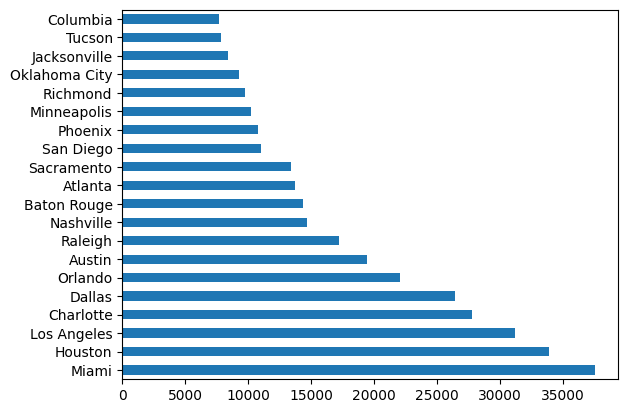

In [31]:
cities_by_accident[:20].plot(kind='barh')

In [32]:
import seaborn as sns
sns.set_style("darkgrid")

<Axes: xlabel='City', ylabel='Count'>

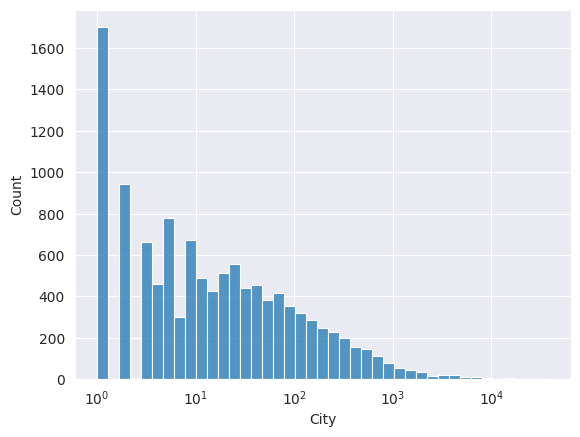

In [33]:
sns.histplot(cities_by_accident, log_scale=True)

In [34]:
cities_by_accident[cities_by_accident == 1]

Oelwein           1
Chenango Forks    1
Geraldine         1
Pisgah            1
Conemaugh         1
                 ..
Shellman          1
Summers           1
Berkshire         1
Mellenville       1
Lachine           1
Name: City, Length: 1701, dtype: int64

Start Time

In [35]:
df.Start_Time

0          2016-02-08 07:39:07
1          2016-02-08 08:53:17
2          2016-02-08 09:25:17
3          2016-02-08 10:11:15
4          2016-02-08 12:00:00
                  ...         
1545673    2019-08-23 15:19:26
1545674    2019-08-23 15:33:46
1545675    2019-08-23 16:28:17
1545676    2019-08-23 16:43:59
1545677    2019-08-23 17:40:12
Name: Start_Time, Length: 1545678, dtype: object

In [36]:
df.Start_Time = pd.to_datetime(df.Start_Time)


<ipython-input-37-cecb2f6b7498>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

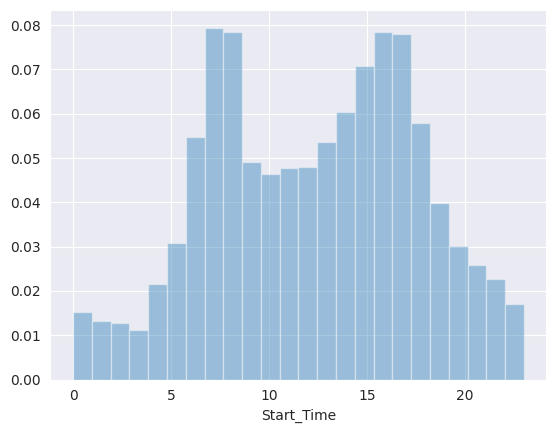

In [37]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


<ipython-input-38-019c7ea578c3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

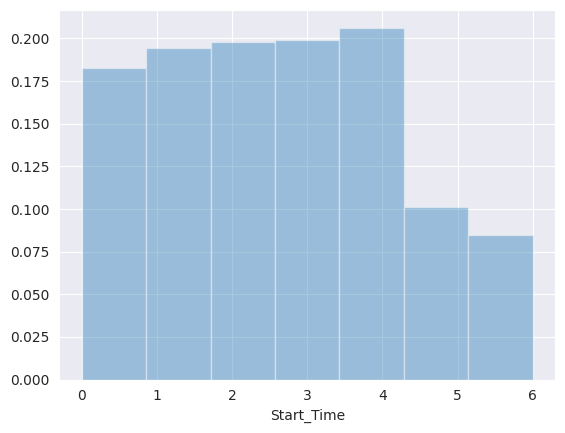

In [38]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<ipython-input-39-6d10f1b09e8f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

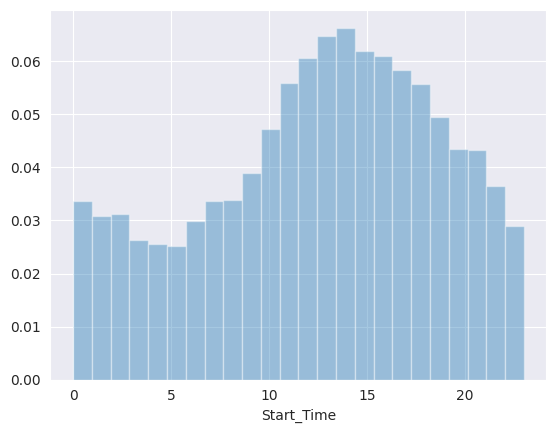

In [39]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

<ipython-input-40-a0c386feb2b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

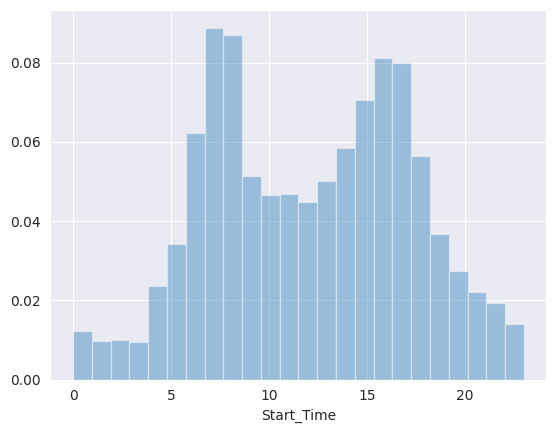

In [40]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

<Axes: ylabel='Source'>

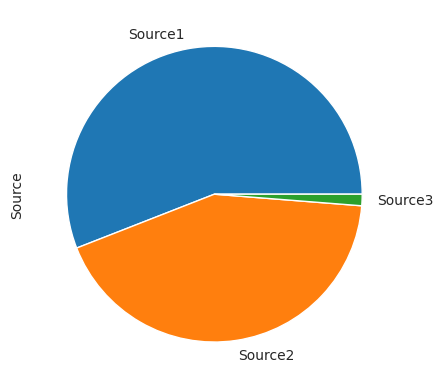

In [42]:
df.Source.value_counts().plot(kind='pie')

Consider excluding Bing data, seems to have issues.

# Start Latitude & Longitude


In [43]:
df.Start_Lat


0          39.627781
1          39.748329
2          39.740669
3          40.052509
4          40.023487
             ...    
1545673    33.802780
1545674    32.773510
1545675    34.323752
1545676    34.120911
1545677    34.261030
Name: Start_Lat, Length: 1545678, dtype: float64

In [44]:
df.Start_Lng

0          -84.188354
1          -84.224007
2          -84.184135
3          -82.882332
4          -82.994888
              ...    
1545673   -118.120810
1545674   -117.161180
1545675   -118.500833
1545676   -117.833454
1545677   -119.228000
Name: Start_Lng, Length: 1545678, dtype: float64

In [45]:
sample_df = df.sample(int(0.1 * len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

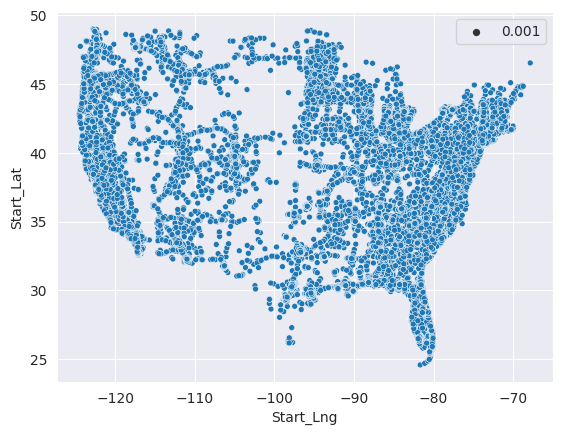

In [46]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [47]:
import folium

In [48]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.627781, -84.188354)

In [49]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

752828     30.236663
1016332    33.837293
132432     37.644783
101635     29.790766
439729     36.038086
             ...    
951856     38.942063
1047577    35.811367
1161769    29.602060
327924     29.736980
74771      40.914730
Name: Start_Lat, Length: 100, dtype: float64
752828     -93.280604
1016332    -84.248881
132432    -122.093872
101635     -95.549110
439729     -86.647392
              ...    
951856     -94.780002
1047577    -78.426017
1161769    -98.399380
327924     -95.369377
74771      -74.018677
Name: Start_Lng, Length: 100, dtype: float64


<ipython-input-49-67bc8524e568>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():


In [50]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [51]:
from folium.plugins import HeatMap

In [52]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [53]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# Summary and Conclusion
Insights:

1.No data from New York

2.The number of accidents per city decreases exponentially

3.Less than 5% of cities have more than 1000 yearly accidents.

4.Over 1200 cities have reported just one accident (need to investigate)